## House Price Prediction with Advance Regression Techniques

In [2]:
#import some necessary libraries
import numpy as np #linear algebra
import pandas as pd #data-preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm # get the norm
import missingno as msno #geting missing values

import scipy.stats as stats
from scipy.stats import skew  # for some statistics

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Now let's import and put the train and test datasets in  pandas dataframe

train_df=pd.read_csv('./train.csv')
test_df=pd.read_csv('./test.csv')

#check the numbers of samples and features in train and test dataset 
print('train has {} rows and {} columns'.format(train_df.shape[0],train_df.shape[1]))
print('test has  {} rows and {} columns'.format(test_df.shape[0],test_df.shape[1]))


train has 1460 rows and 81 columns
test has  1459 rows and 80 columns


In [4]:
#Disply First five records of train dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Display First Five records of test dataset
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#combine train set and test set to perfome same operations on both
all_data_df=pd.concat([train_df.drop('SalePrice', axis=1),test_df],axis=0)
print('shape of all_data without sales price {}'.format(all_data_df.shape))


shape of all_data without sales price (2919, 80)


In [7]:
#get more inormation about train dataset
all_data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Data Preprocessing

- finding missing values

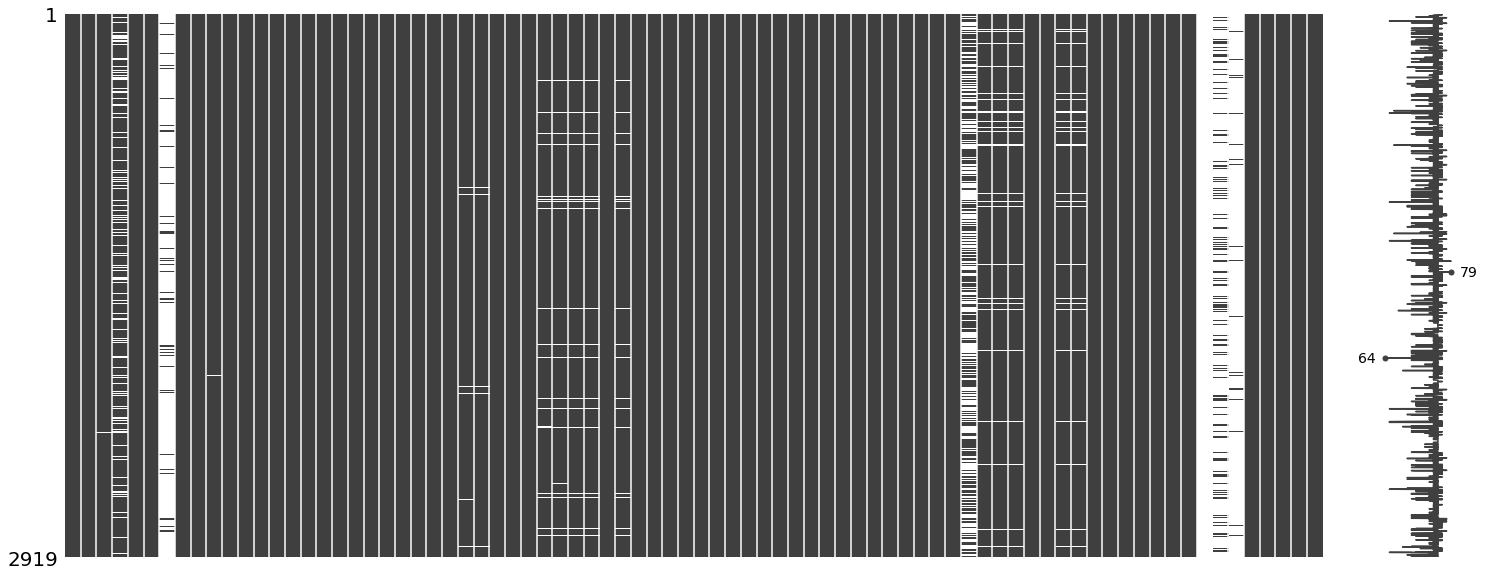

In [8]:
#null values with the help of heatmap 
#sns.heatmap(all_data_df.isnull())
msno.matrix(all_data_df);

In [9]:
#missing values with count and percentage
count=all_data_df.isnull().sum().sort_values(ascending=False)[
    all_data_df.isnull().sum().sort_values(ascending=False)!=0]
percent=round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)[round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)!=0]
missing_value_df=pd.concat([count,percent],axis=1)

#View missing df
missing_value_df

,0,1
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


###  Target Value Analysis

    I want to focus on the target variable which is SalePrice. Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression.

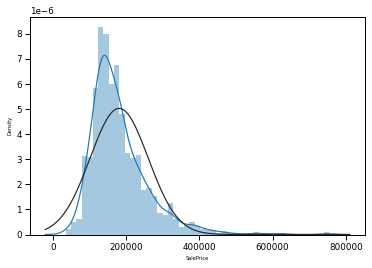

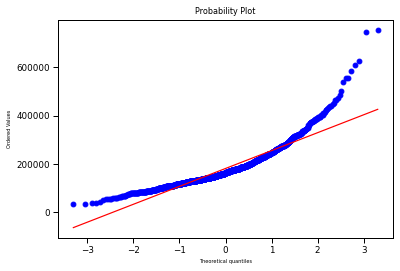

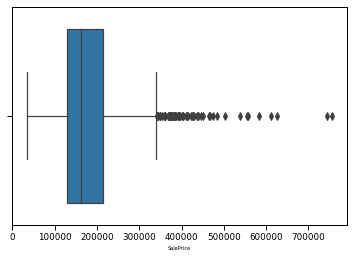

In [10]:
# Histrogram to see how data is distributes
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5}) 
sns.distplot(train_df['SalePrice'],fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

## Plotting the box plot. 
sns.boxplot(train_df['SalePrice']);

These three charts above can tell us a lot about our target variable.

- Our target variable, SalePrice is not normally distributed.
- Our target variable is right-skewed.
- There are multiple outliers in the variable.

In [11]:
#skewness and kurtosis
print("Skewness: " + str(train_df['SalePrice'].skew()))
print("Kurtosis: " + str(train_df['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<AxesSubplot:>

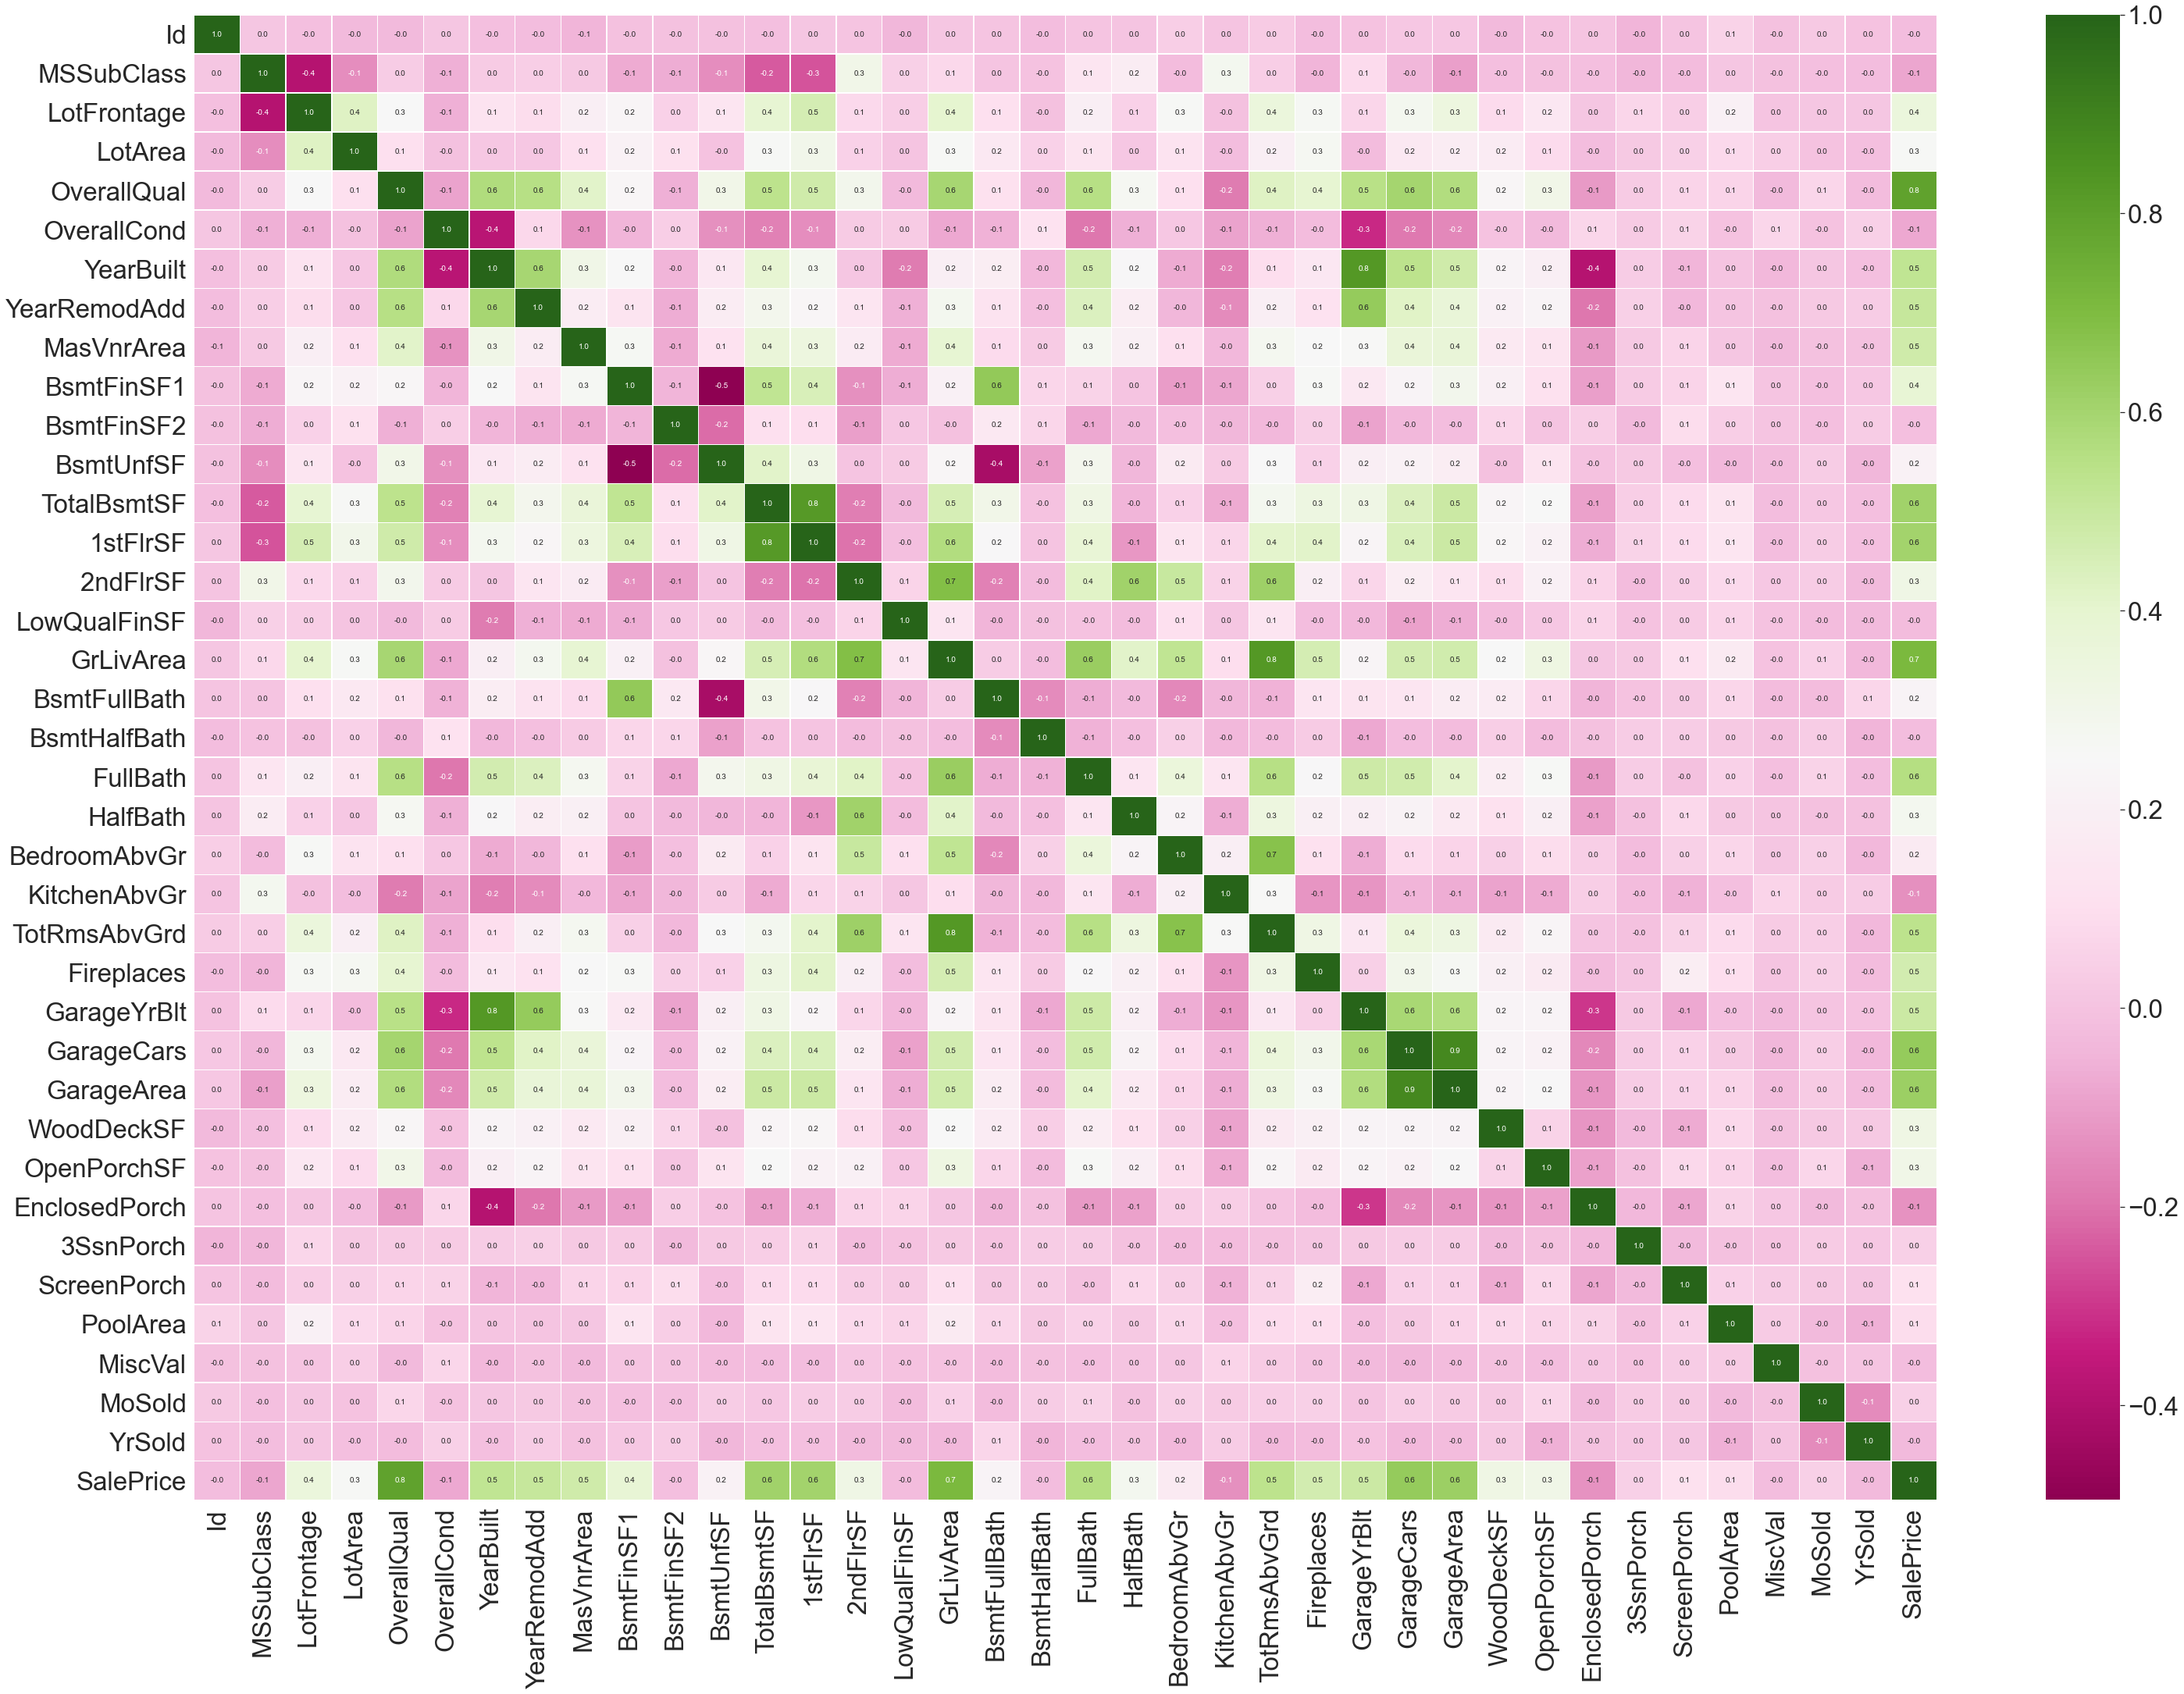

In [12]:
#view correlation between train_df features and sales price
sns.set(font_scale=3)
plt.figure(figsize=(50,35))
sns.heatmap(train_df.corr(),annot=True,annot_kws={'size':10},fmt='.1f',
           cmap='PiYG',linewidths=.5)

<AxesSubplot:>

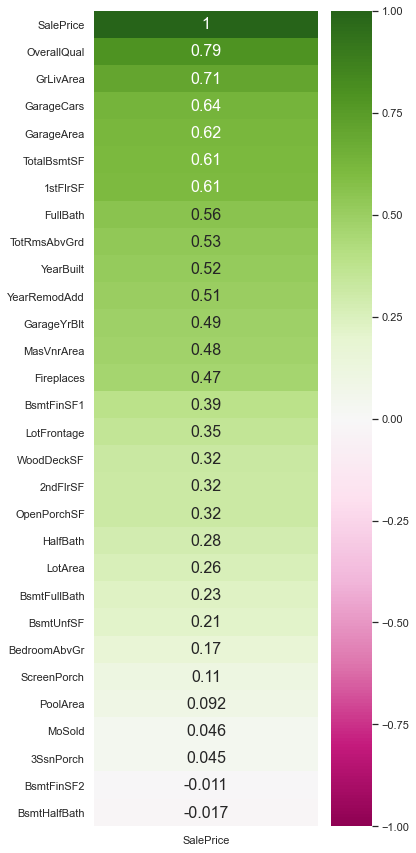

In [41]:
## Getting the correlation of all the features with target variable. 
sns.set(font_scale=1)
corr_new_train=train_df.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)





#(train_df.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

These are the predictor variables sorted in a descending order starting with the most correlated one OverallQual. Let's put this one in a scatter plot and see how it looks.

####  SalePrice vs OverallQual

In [ ]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

In [ ]:
sns.set(font_scale=1)
customized_scatterplot(y = train_df.SalePrice, x = train_df.OverallQual)

#sns.scatterplot(y = train_df.SalePrice, x = train_df.OverallQual);

OverallQual is a categorical variable, and a scatter plot is not the best way to visualize categorical variables. However, there is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's check out some more features to determine the outliers. Let's focus on the numerical variables this time. 

#### SalePrice vs GrLivArea

In [ ]:
customized_scatterplot(train_df.SalePrice, train_df.GrLivArea)

#As you can see, there are two outliers in the plot above. We will get rid off them later. Let's look at another scatter plot with a different feature

#### SalePrice vs GarageArea

In [ ]:
customized_scatterplot(train_df.SalePrice, train_df.GarageArea);

#### SalePrice vs TotalBsmtSF

In [ ]:
customized_scatterplot(train_df.SalePrice, train_df.TotalBsmtSF)

#### SalePrice vs 1stFlrSF

In [ ]:
customized_scatterplot(train_df.SalePrice, train_df['1stFlrSF']);

#### SalePrice vs MasVnrArea 

In [ ]:
customized_scatterplot(train_df.SalePrice, train_df['MasVnrArea']);

### Observations
- Our target variable shows an unequal level of variance across most predictor(independent) variables. This is called Heteroscedasticity(more explanation below) and is a red flag for the multiple linear regression model.
- There are many outliers in the scatter plots above that took my attention.

- The two on the top-right edge of SalePrice vs. GrLivArea seem to follow a trend, which can be explained by saying that "As the prices increased, so did the area.

- However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.

In [ ]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train_df.GrLivArea, y = train_df.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train_df.GrLivArea, y=train_df.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train_df.MasVnrArea,y = train_df.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train_df.MasVnrArea, y=train_df.SalePrice, ax=ax2);

##Here we are plotting our target variable with two independent variables GrLivArea and MasVnrArea. It's pretty apparent from the chart that there is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea. One thing to take note here, there are some outliers in the dataset. It is imperative to check for outliers since linear regression is sensitive to outlier effects. Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data. In that case, we may need to change our function depending on the data to get the best possible fit. In addition to that, we can also check the residual plot, which tells us how is the error variance across the true line. Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice .

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(train_df.GrLivArea, train_df.SalePrice);

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. Let's break this down.

In [ ]:
## trainsforming target variable using numpy.log1p, 
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

In [ ]:
# Histrogram to see how data is distributes
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5}) 
sns.distplot(train_df['SalePrice'],fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

## Plotting the box plot. 
sns.boxplot(train_df['SalePrice']);

Now, let's make sure that the target variable follows a normal distribution

Let's make a comparison of the pre-transformed and post-transformed state of residual plots.

In [ ]:

sns.residplot(x = train_df.GrLivArea, y = train_df.SalePrice);


Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions.



### Feature engineering

#### Imputing Missing Values

In [14]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data_df[i] = all_data_df[i].fillna('None')

In [15]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data_df[i] = all_data_df[i].fillna(0)
    
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data_df['LotFrontage'] = all_data_df.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [16]:
## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data_df['MSSubClass'] = all_data_df['MSSubClass'].astype(str)
all_data_df['MSZoning'] = all_data_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data_df['YrSold'] = all_data_df['YrSold'].astype(str)
all_data_df['MoSold'] = all_data_df['MoSold'].astype(str)

all_data_df['Functional'] = all_data_df['Functional'].fillna('Typ') 
all_data_df['Utilities'] = all_data_df['Utilities'].fillna('AllPub') 
all_data_df['Exterior1st'] = all_data_df['Exterior1st'].fillna(all_data_df['Exterior1st'].mode()[0]) 
all_data_df['Exterior2nd'] = all_data_df['Exterior2nd'].fillna(all_data_df['Exterior2nd'].mode()[0])
all_data_df['KitchenQual'] = all_data_df['KitchenQual'].fillna("TA") 
all_data_df['SaleType'] = all_data_df['SaleType'].fillna(all_data_df['SaleType'].mode()[0])
all_data_df['Electrical'] = all_data_df['Electrical'].fillna("SBrkr") 


In [17]:
#missing values with count and percentage
count=all_data_df.isnull().sum().sort_values(ascending=False)[
    all_data_df.isnull().sum().sort_values(ascending=False)!=0]
percent=round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)[round(all_data_df.isnull().sum().sort_values(ascending=False)
               /len(all_data_df)*100,2)!=0]
missing_value_df=pd.concat([count,percent],axis=1)

#View missing df
missing_value_df

,0,1


### Fixing Skewness

In [18]:
numeric_feats = all_data_df.dtypes[all_data_df.dtypes != "object"].index

skewed_feats = all_data_df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
FullBath          0.167606
Id                0.000000
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

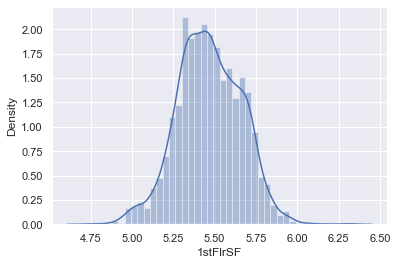

In [42]:
sns.set(font_scale=1)
sns.distplot(all_data_df['1stFlrSF']);

In [43]:
## Fixing Skewed features using boxcox transformation. 


def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data_df)

ValueError: array must not contain infs or NaNs

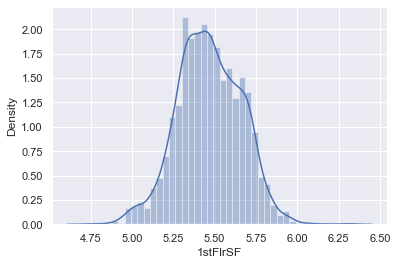

In [44]:
sns.distplot(all_data_df['1stFlrSF']);

In [22]:
# feture engineering a new feature "TotalFS"
all_data_df['TotalSF'] = (all_data_df['TotalBsmtSF'] 
                       + all_data_df['1stFlrSF'] 
                       + all_data_df['2ndFlrSF'])

all_data_df['YrBltAndRemod'] = all_data_df['YearBuilt'] + all_data_df['YearRemodAdd']

all_data_df['Total_sqr_footage'] = (all_data_df['BsmtFinSF1'] 
                                 + all_data_df['BsmtFinSF2'] 
                                 + all_data_df['1stFlrSF'] 
                                 + all_data_df['2ndFlrSF']
                                )
                                 

all_data_df['Total_Bathrooms'] = (all_data_df['FullBath'] 
                               + (0.5 * all_data_df['HalfBath']) 
                               + all_data_df['BsmtFullBath'] 
                               + (0.5 * all_data_df['BsmtHalfBath'])
                              )
                               

all_data_df['Total_porch_sf'] = (all_data_df['OpenPorchSF'] 
                              + all_data_df['3SsnPorch'] 
                              + all_data_df['EnclosedPorch'] 
                              + all_data_df['ScreenPorch'] 
                              + all_data_df['WoodDeckSF']
                             )

In [23]:
all_data_df['haspool'] = all_data_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['has2ndfloor'] = all_data_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['hasgarage'] = all_data_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['hasbsmt'] = all_data_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['hasfireplace'] = all_data_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Deleting features

In [24]:
all_data_df = all_data_df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

### Creating Dummy Variables

In [25]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data_df).reset_index(drop=True)
final_features.shape

(2919, 335)

In [26]:
y=train_df.SalePrice
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [27]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [28]:
counts = X.BsmtUnfSF.value_counts()

In [29]:
counts.iloc[0]

117

In [30]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [31]:
X.shape,y.shape, X_sub.shape

((1455, 334), (1455,), (1459, 334))

In [32]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((974, 334), (974,), (481, 334), (481,))

In [34]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

58442327722890033116854156787712.00


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')


In [36]:
print ('%.8f'%scores.mean())

-51545.86302470


In [102]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [103]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [104]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno



ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)      


lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)




In [105]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Ridge: 0.1228 (0.0444)

LASSO: 0.1194 (0.0430)

elastic net: 0.1196 (0.0431)

SVR: 0.1182 (0.0461)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Cu